# Word2Vec 소개

1안) 자신의 문장으로 단어별 벡터를 생성한다.

In [2]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [4]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [5]:
# 문장을 이용하여 단어와 벡터를 생성
model = Word2Vec(sentences, size=3, window=3, min_count=1, workers=1)

In [6]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [7]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [8]:
word_vectors_list

[array([-0.02261515,  0.16446753,  0.10408001], dtype=float32),
 array([0.02011097, 0.08878417, 0.09685639], dtype=float32),
 array([-0.04152497, -0.07302008,  0.12393255], dtype=float32),
 array([ 0.09923804,  0.02756087, -0.01137167], dtype=float32),
 array([ 0.0736009 , -0.16184181, -0.14124516], dtype=float32),
 array([ 0.08241747,  0.08076875, -0.07219504], dtype=float32),
 array([ 0.07346748,  0.02640087, -0.1265032 ], dtype=float32),
 array([ 0.14275384, -0.09381274,  0.04124668], dtype=float32),
 array([-0.04085321, -0.1588236 ,  0.10872146], dtype=float32),
 array([ 0.10871179,  0.08594293, -0.0195035 ], dtype=float32),
 array([-0.05282965,  0.11407001, -0.00873053], dtype=float32)]

In [9]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.1464442

In [11]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

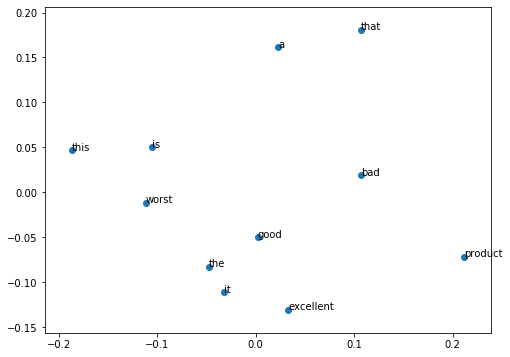

In [12]:
plot_2d_graph(vocabs, xs, ys)

3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.
(보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

In [13]:
# 교차를 위해 차원을 맞춘다
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [14]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
filename = 'data/GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [15]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [16]:
len(word_vectors_list)

11

In [17]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386158

In [18]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

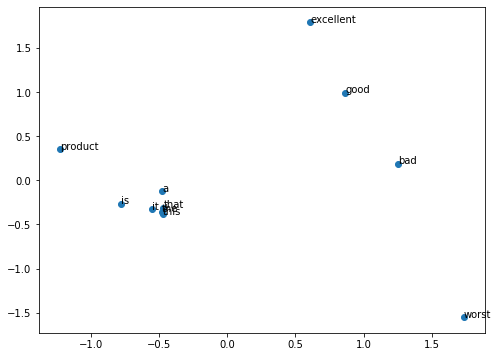

In [19]:
plot_2d_graph(vocabs, xs, ys)

In [23]:
#모델 저장
model.save('model/01_word2vec.model')

In [20]:
del model

In [21]:
word_vector = model.wv

NameError: name 'model' is not defined

In [22]:
#로드
model = Word2Vec.load('model/01_word2vec.model')

In [23]:
word_vector = model.wv